In [801]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [751]:
df = pd.read_excel('glass_copy.xlsx')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [753]:
# Looks like there are no Null values in the dataset. 

In [754]:
df.duplicated().sum()

1

In [755]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop(columns = 'index',inplace=True)

In [756]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [757]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


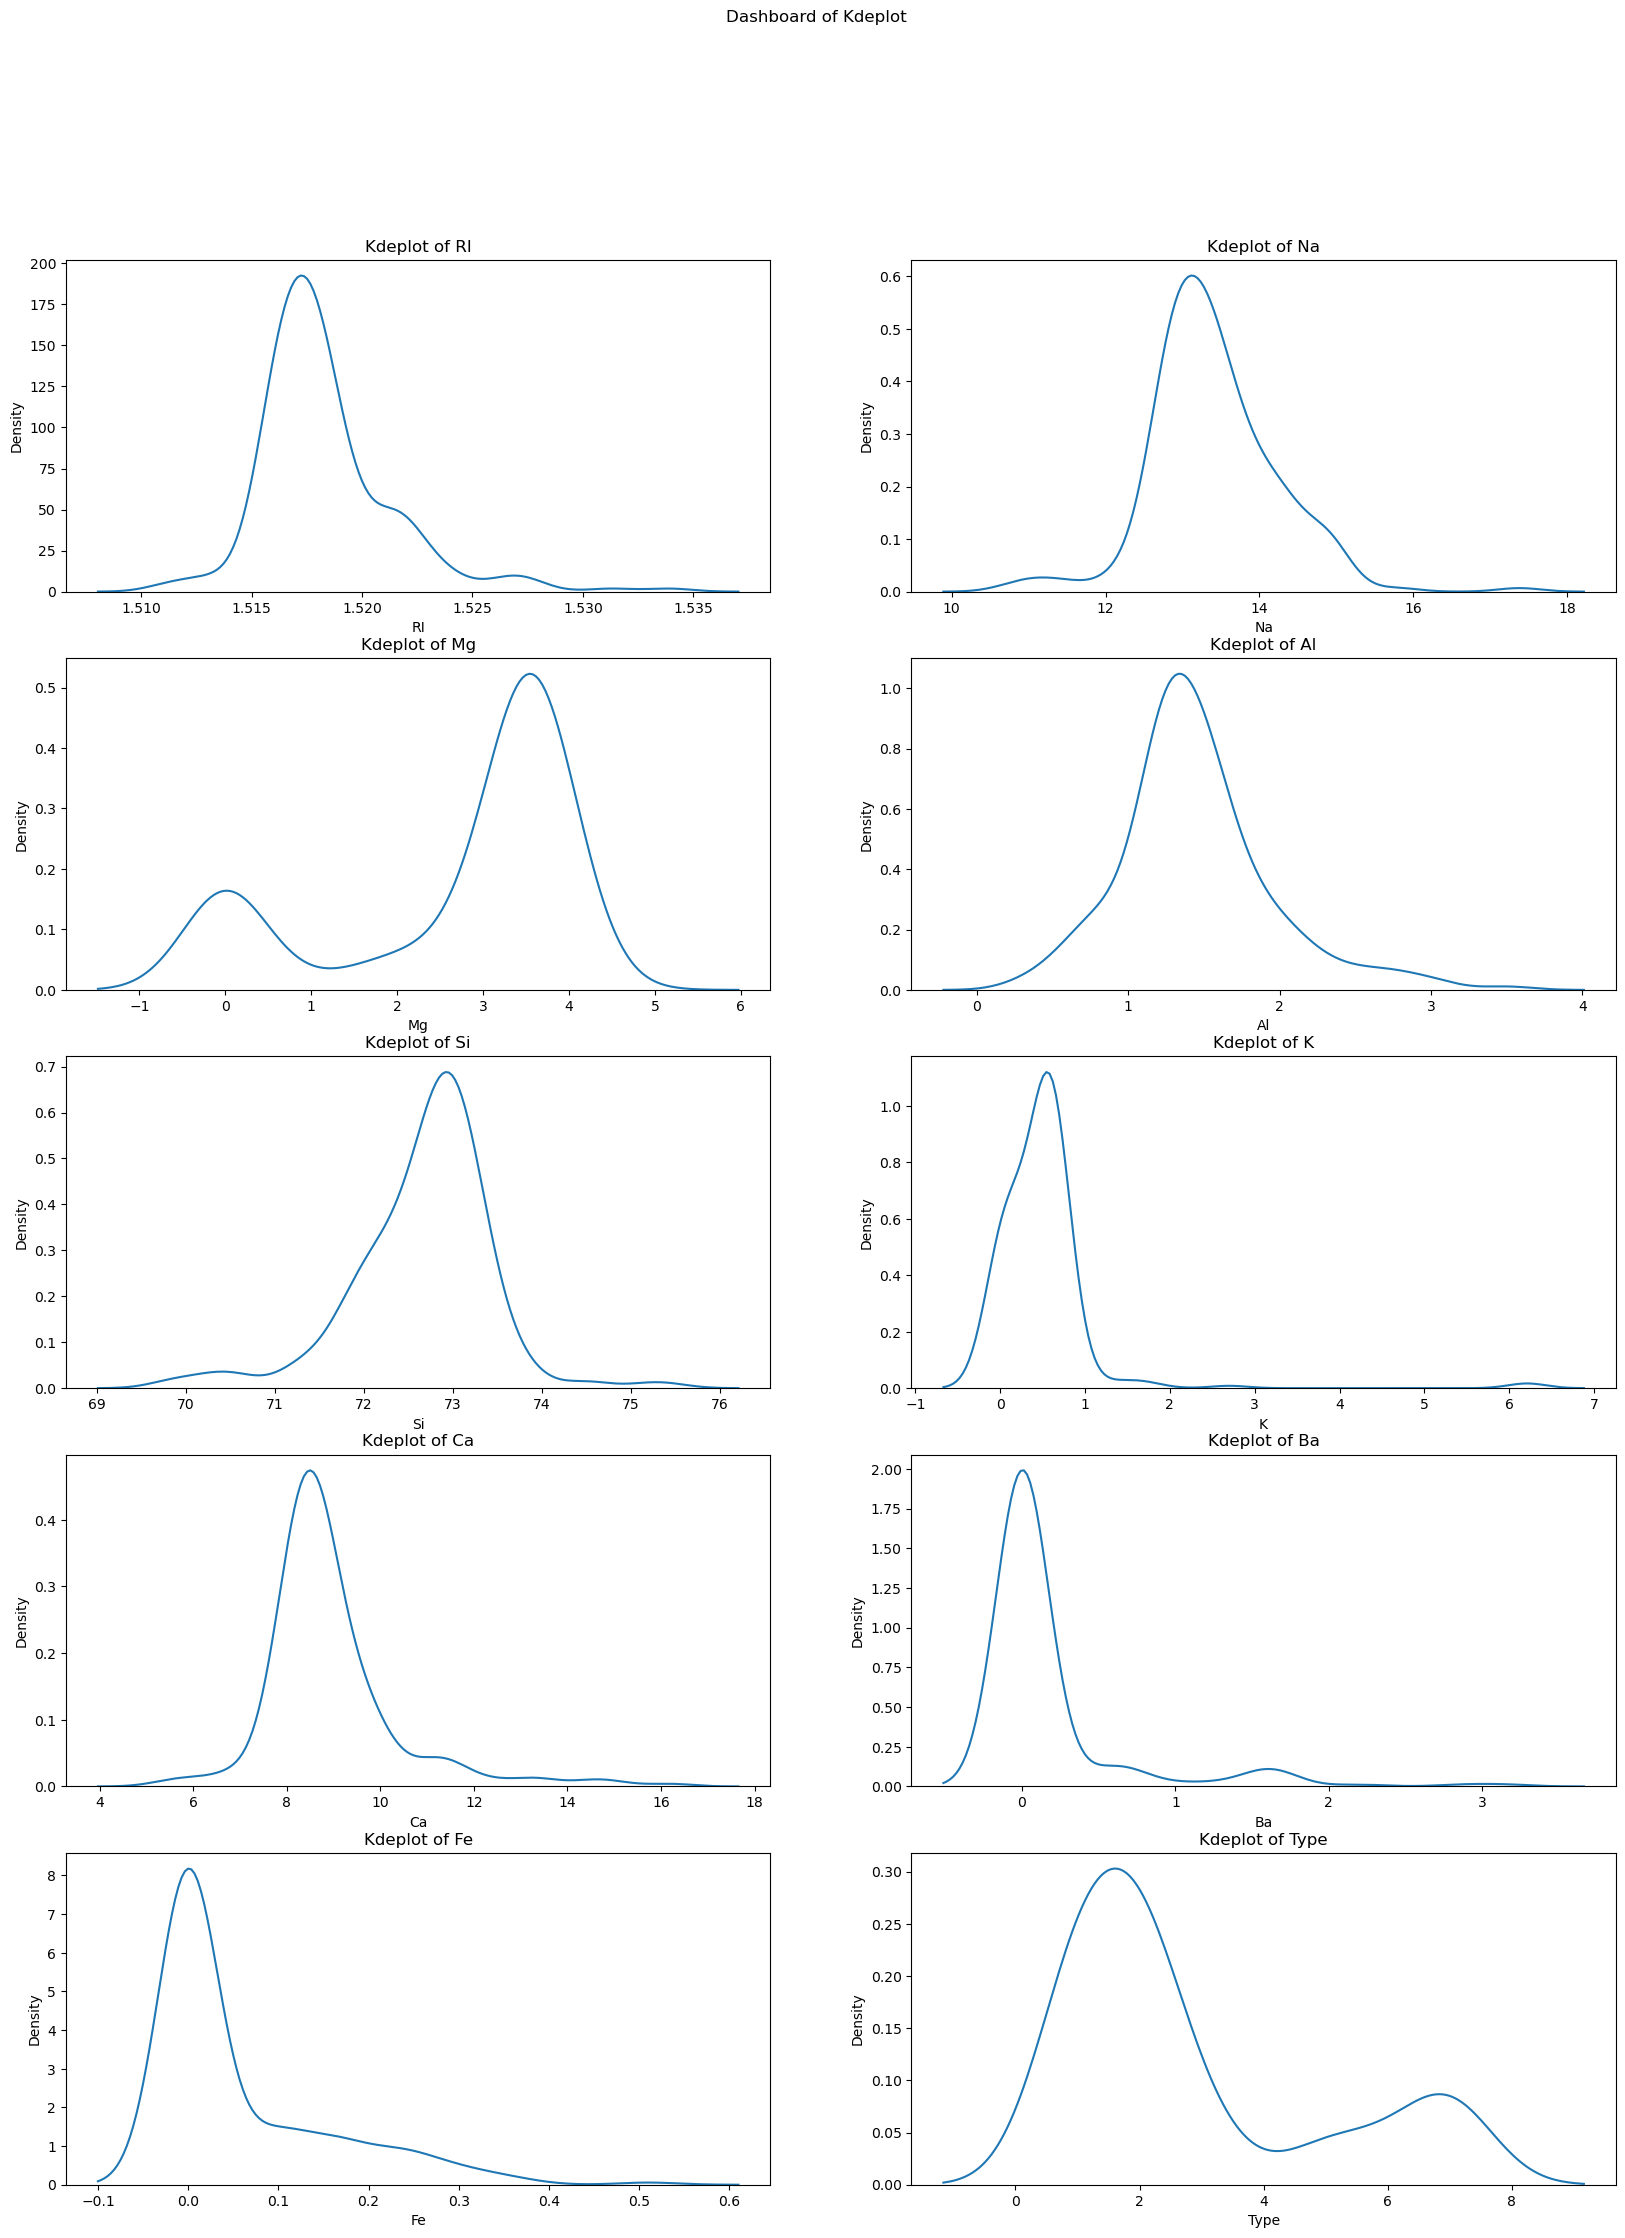

In [758]:
fig,axes = plt.subplots(5,2,figsize=(20,25))

sns.kdeplot(df['RI'],ax=axes[0,0])
axes[0,0].set_title('Kdeplot of RI')

sns.kdeplot(df['Na'],ax=axes[0,1])
axes[0,1].set_title('Kdeplot of Na')

sns.kdeplot(df['Mg'],ax=axes[1,0])
axes[1,0].set_title('Kdeplot of Mg')

sns.kdeplot(df['Al'],ax=axes[1,1])
axes[1,1].set_title('Kdeplot of Al')

sns.kdeplot(df['Si'],ax=axes[2,0])
axes[2,0].set_title('Kdeplot of Si')

sns.kdeplot(df['K'],ax=axes[2,1])
axes[2,1].set_title('Kdeplot of K')

sns.kdeplot(df['Ca'],ax=axes[3,0])
axes[3,0].set_title('Kdeplot of Ca')

sns.kdeplot(df['Ba'],ax=axes[3,1])
axes[3,1].set_title('Kdeplot of Ba')

sns.kdeplot(df['Fe'],ax=axes[4,0])
axes[4,0].set_title('Kdeplot of Fe')

sns.kdeplot(df['Type'],ax=axes[4,1])
axes[4,1].set_title('Kdeplot of Type')

plt.suptitle('Dashboard of Kdeplot')
plt.show()

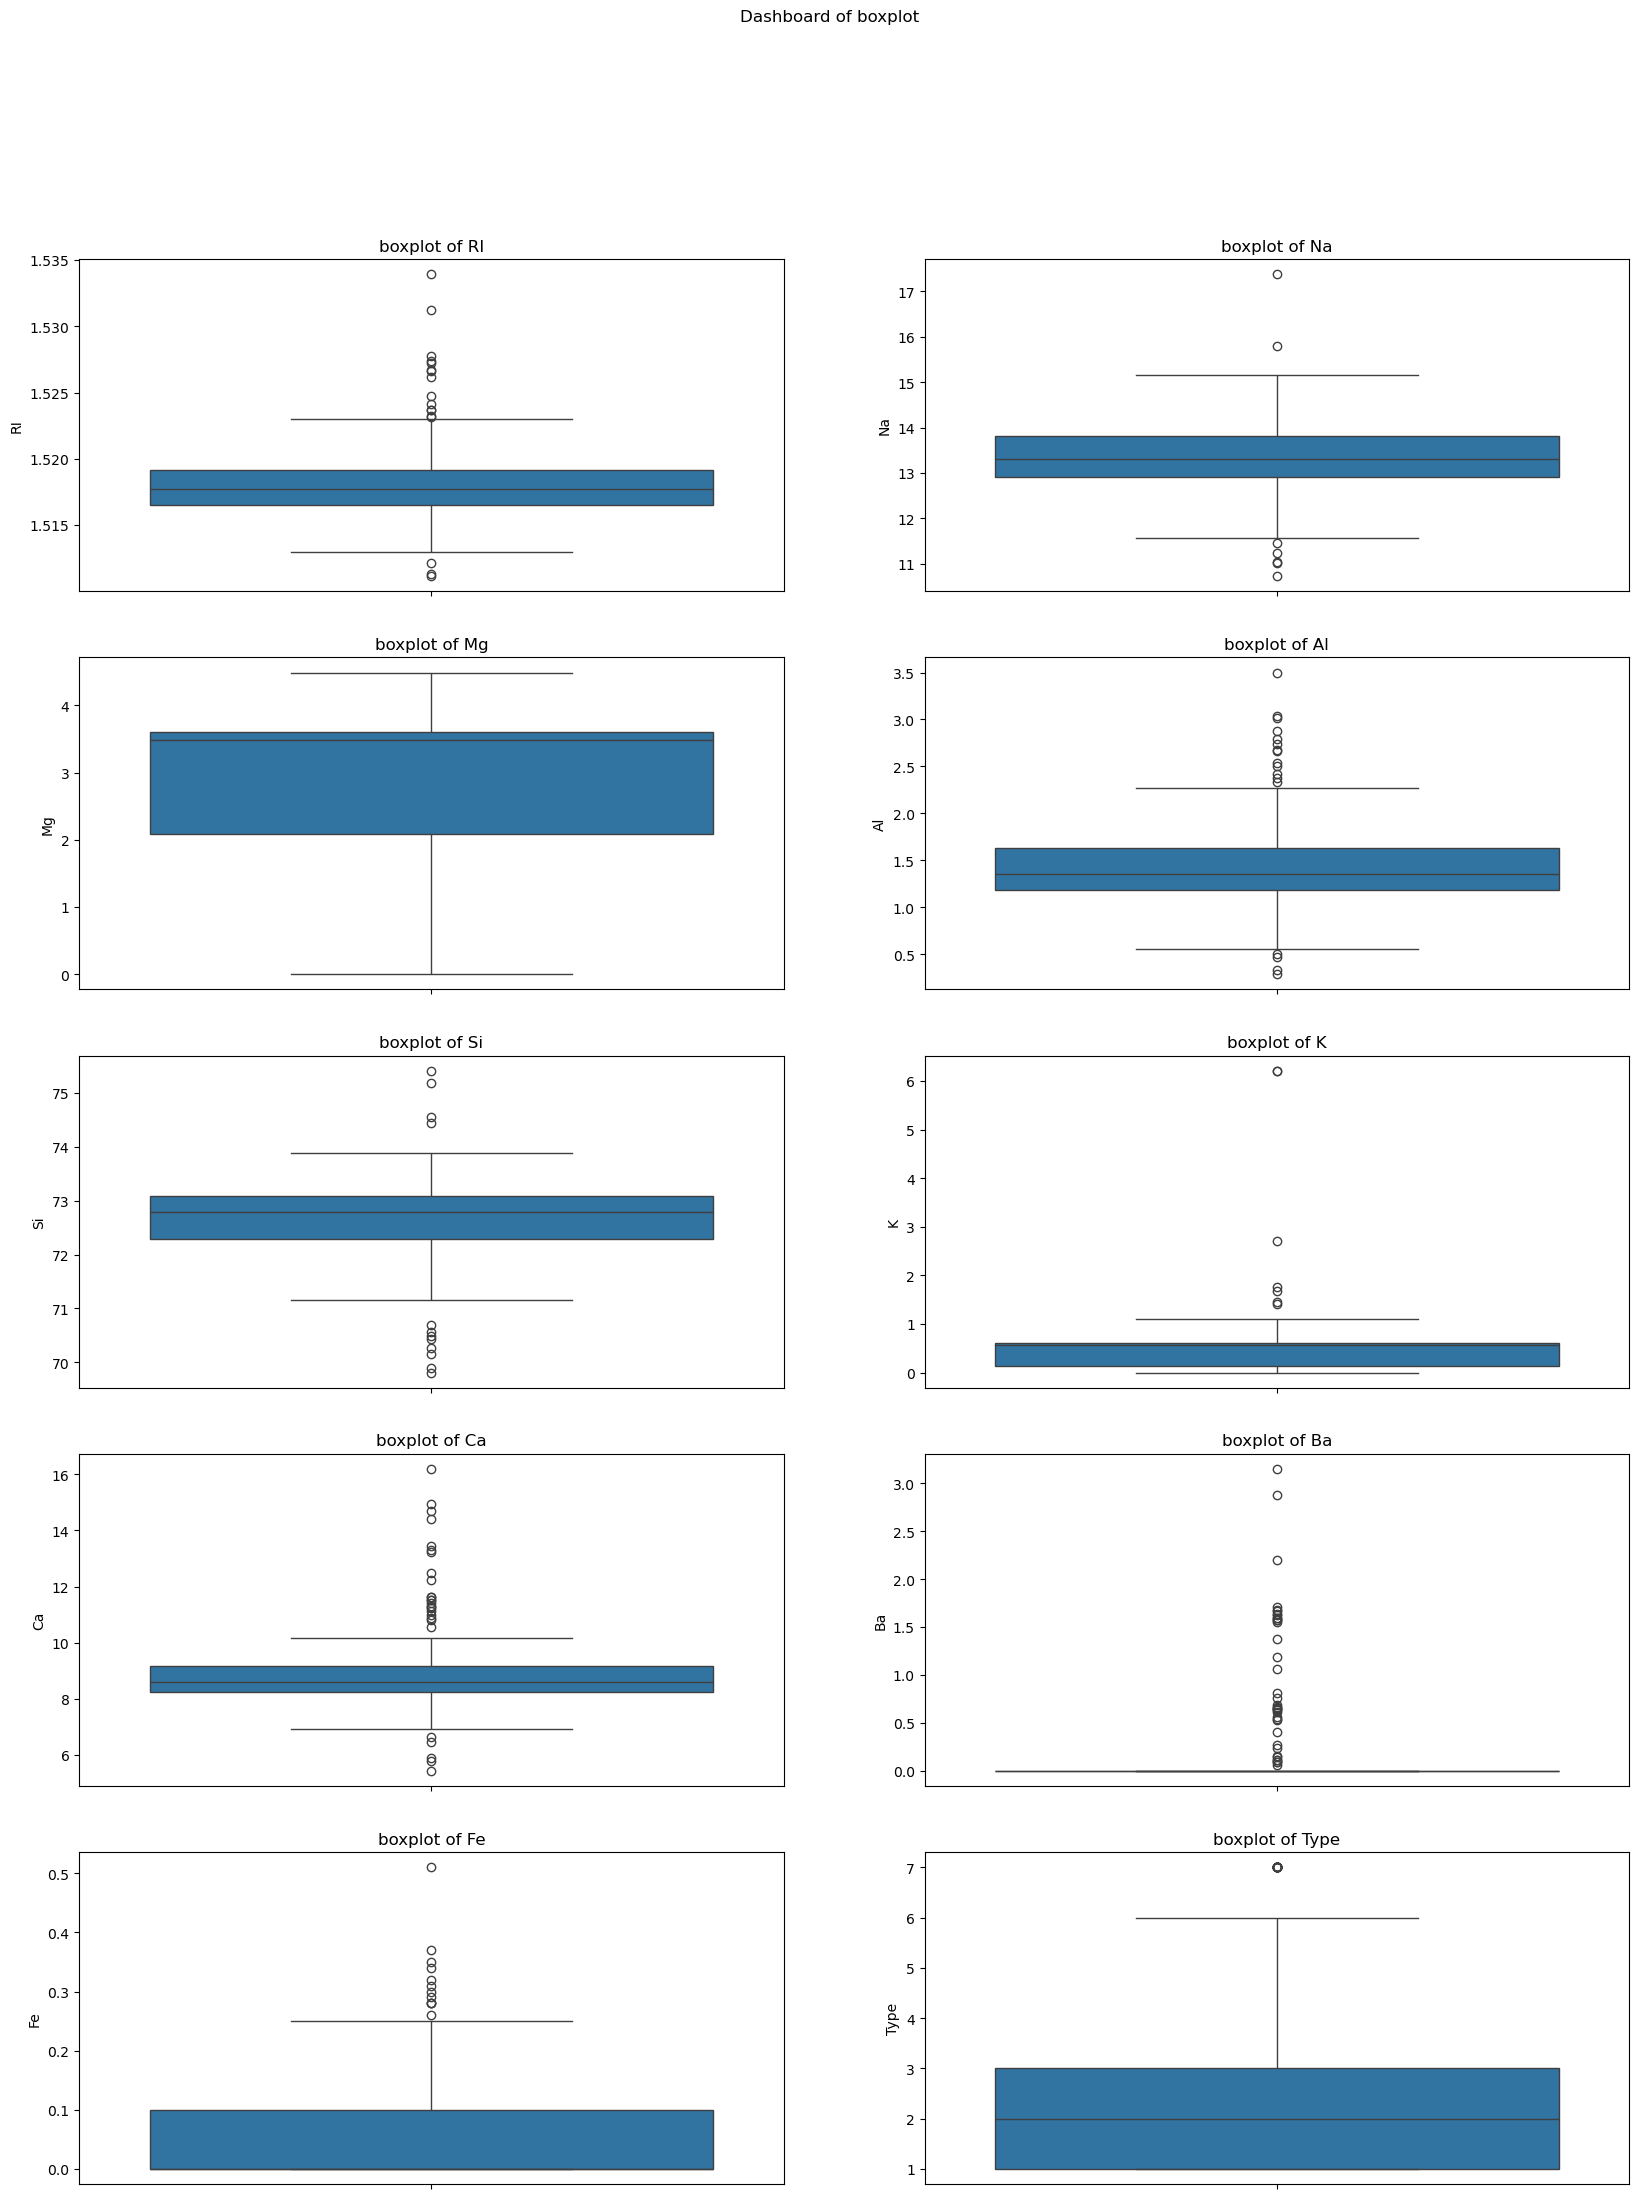

In [759]:
fig,axes = plt.subplots(5,2,figsize=(20,25))

sns.boxplot(df['RI'],ax=axes[0,0])
axes[0,0].set_title('boxplot of RI')

sns.boxplot(df['Na'],ax=axes[0,1])
axes[0,1].set_title('boxplot of Na')

sns.boxplot(df['Mg'],ax=axes[1,0])
axes[1,0].set_title('boxplot of Mg')

sns.boxplot(df['Al'],ax=axes[1,1])
axes[1,1].set_title('boxplot of Al')

sns.boxplot(df['Si'],ax=axes[2,0])
axes[2,0].set_title('boxplot of Si')

sns.boxplot(df['K'],ax=axes[2,1])
axes[2,1].set_title('boxplot of K')

sns.boxplot(df['Ca'],ax=axes[3,0])
axes[3,0].set_title('boxplot of Ca')

sns.boxplot(df['Ba'],ax=axes[3,1])
axes[3,1].set_title('boxplot of Ba')

sns.boxplot(df['Fe'],ax=axes[4,0])
axes[4,0].set_title('boxplot of Fe')

sns.boxplot(df['Type'],ax=axes[4,1])
axes[4,1].set_title('boxplot of Type')

plt.suptitle('Dashboard of boxplot')
plt.show()

In [760]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [761]:
df['Type'].value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [762]:
ms = MinMaxScaler()
new_df = df.iloc[:,:9].copy()
new_df = pd.DataFrame(ms.fit_transform(new_df))
new_df.columns = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
new_df['Type'] = df['Type']
new_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,7
209,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,7
210,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,7
211,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,7


In [763]:
X = new_df.iloc[:,:9]
y = new_df['Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 9)
(43, 9)
(170,)
(43,)


In [764]:
model = RandomForestClassifier(n_estimators=100,max_samples=0.9,max_features=0.9,max_depth=7)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, max_features=0.9, max_samples=0.9)

In [765]:
y_test_pred = model.predict(X_test)
accuracy_score(y_test_pred,y_test)

0.7674418604651163

In [766]:
f1_score(y_test_pred,y_test,average='macro')

0.6905844155844155

In [767]:
precision_score(y_test_pred,y_test,average='macro')

0.7444444444444445

In [768]:
print("testing classification report \n",classification_report(y_test_pred,y_test))

testing classification report 
               precision    recall  f1-score   support

           1       1.00      0.75      0.86        20
           2       0.47      1.00      0.64         7
           3       0.50      0.33      0.40         3
           5       1.00      0.60      0.75         5
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         6

    accuracy                           0.77        43
   macro avg       0.74      0.70      0.69        43
weighted avg       0.86      0.77      0.78        43



In [769]:
 # Other Bagging methods
bag_model = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 80,
    max_samples = 0.7
)
bag_model.fit(X_train,y_train)
y2_pred = bag_model.predict(X_test)

In [770]:
accuracy_score(y2_pred,y_test)

0.813953488372093

In [795]:
f1_score(y2_pred,y_test,average='macro')

0.7303921568627452

In [797]:
precision_score(y2_pred,y_test,average='macro')

0.7666666666666666

In [799]:
print("testing classification report \n",classification_report(y2_pred,y_test))

testing classification report 
               precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           2       0.60      1.00      0.75         9
           3       0.50      0.50      0.50         2
           5       1.00      0.60      0.75         5
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.77      0.73      0.73        43
weighted avg       0.87      0.81      0.82        43



In [803]:
# Lets use boosting algorithms.
boost_model = GradientBoostingClassifier(n_estimators=100,learning_rate=2,max_depth=7)
boost_model.fit(X_train,y_train)
y_boost_pred = boost_model.predict(X_test)
accuracy_score(y_boost_pred,y_test)

0.7906976744186046

In [805]:
f1_score(y_boost_pred,y_test,average='macro')

0.7521249359959037

In [807]:
precision_score(y_boost_pred,y_test,average='macro')

0.8277777777777778

In [809]:
print("testing classification report \n",classification_report(y_boost_pred,y_test))

testing classification report 
               precision    recall  f1-score   support

           1       0.93      0.88      0.90        16
           2       0.53      0.89      0.67         9
           3       0.50      0.20      0.29         5
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.83      0.73      0.75        43
weighted avg       0.82      0.79      0.78        43



# 1. Explain Bagging and Boosting methods. How is it different from each other.

# 2. Explain how to handle imbalance in the data.